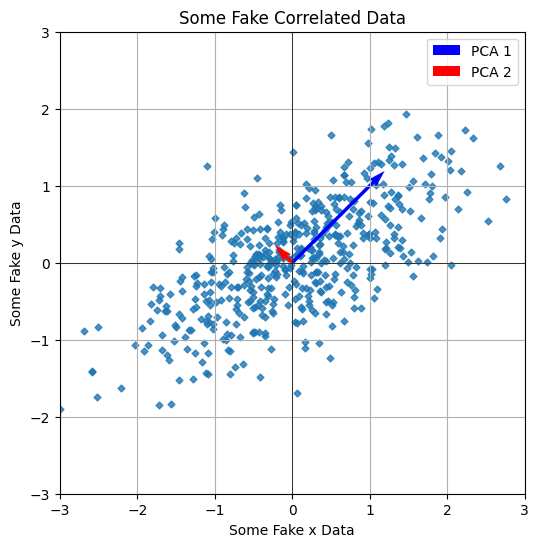

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Make some data to see what's going on 

'''
Data in the form 

y = b * x + gaussian noise

mean of y should be zero
gaussian noise is scaled by sigma
change number of points in the dataset
'''

# mess around with these guys 
num_points = 500
sigma = 0.5
b = 0.5

x = np.zeros(num_points)
y = np.zeros(num_points)

for i in range(num_points):
    x[i] = np.random.normal(0,1)
    y[i] = b * x[i] + sigma * np.random.normal(0,1)

# Do I need to do this?? 
# x = (x - x.mean())/ x.std()
# y = (y - y.mean()) / y.std()

fake_df = pd.DataFrame({'x': x, 'y': y})
corr_matrix = fake_df.corr()
eigvals, eigvecs = np.linalg.eig(corr_matrix)

# Extract the eigenvectors
# These eigvecs are scaled by eigvals (larger eigval means larger variance along this PCA)
v1, v2 = eigvals[0] * eigvecs[:, 0], eigvals[1] * eigvecs[:, 1]

# These ones just show normalised eigvecs
# v1, v2 = eigvecs[:, 0], eigvecs[:, 1]


# Create a plot
plt.figure(figsize=(6,6))

# Plot the points in the time series 
plt.scatter(fake_df['x'], fake_df['y'], marker='D', s=12, alpha=0.8)

# Plot the eigenvectors as arrows
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='PCA 1')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='red', label='PCA 2')

# Set plot limits and labels
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('Some Fake x Data')
plt.ylabel('Some Fake y Data')

# Add a legend
plt.legend()

# Show the plot
plt.title('Some Fake Correlated Data')
plt.grid()
plt.show()